# Example Usage

This is a basic example using the torchvision COCO dataset from coco.py, it assumes that you've already downloaded the COCO images and annotations JSON.  You'll notice that the scale augmentations are quite extreme.

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import cv2
import numpy as np
from copy_paste import CopyPaste
from coco import CocoDetectionCP
from visualize import display_instances
import albumentations as A
import random
from matplotlib import pyplot as plt
import os

In [6]:
transform = A.Compose([
        A.RandomScale(scale_limit=(-0.9, 1), p=1), #LargeScaleJitter from scale of 0.1 to 2
        A.PadIfNeeded(256, 256, border_mode=0), #pads with image in the center, not the top left like the paper
        A.RandomCrop(256, 256),
        CopyPaste(blend=True, sigma=1, pct_objects_paste=0.8, p=1.) #pct_objects_paste is a guess
    ], bbox_params=A.BboxParams(format="coco", min_visibility=0.05)
)

In [7]:
os.getcwd()

'C:\\Users\\Andreas\\Documents\\DTU filer\\0 Specialkursus - DL & CV\\Exercises\\project\\src\\copy-paste'

In [20]:
data = CocoDetectionCP(
    '../../data/coco_minitrain_25k/images_pruned/train2017',
    '../../data/coco_minitrain_25k/annotations/instances_train2017_pruned.json', 
    transform
)

loading annotations into memory...
Done (t=2.71s)
creating index...
index created!


Amount of bounding boxes: 5
Image index: 13066
Paste image index: 3981


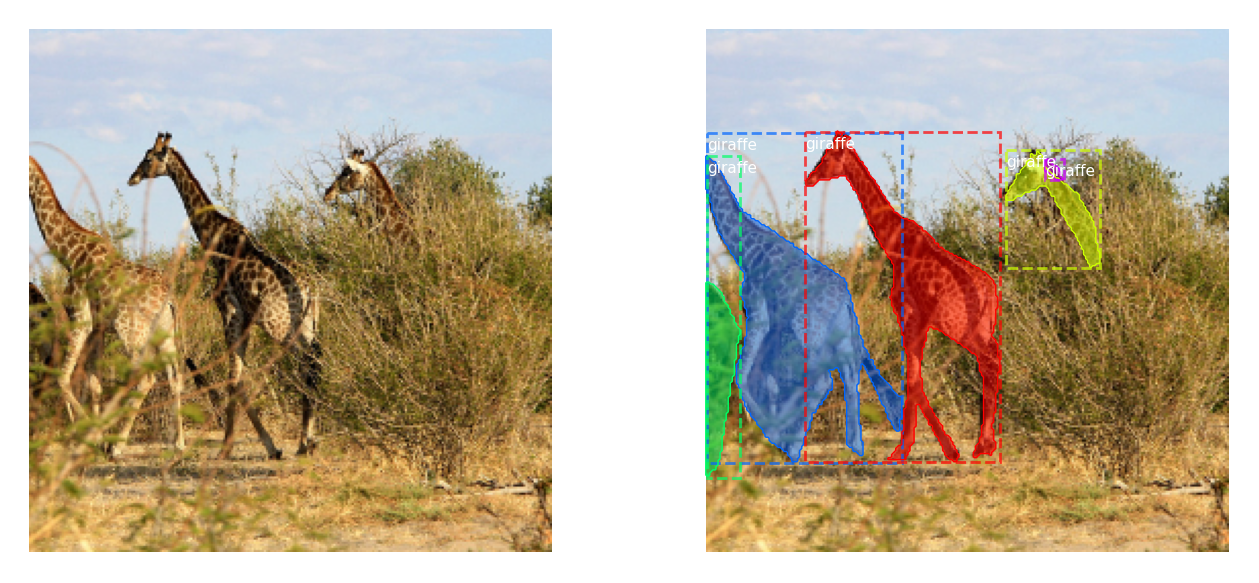

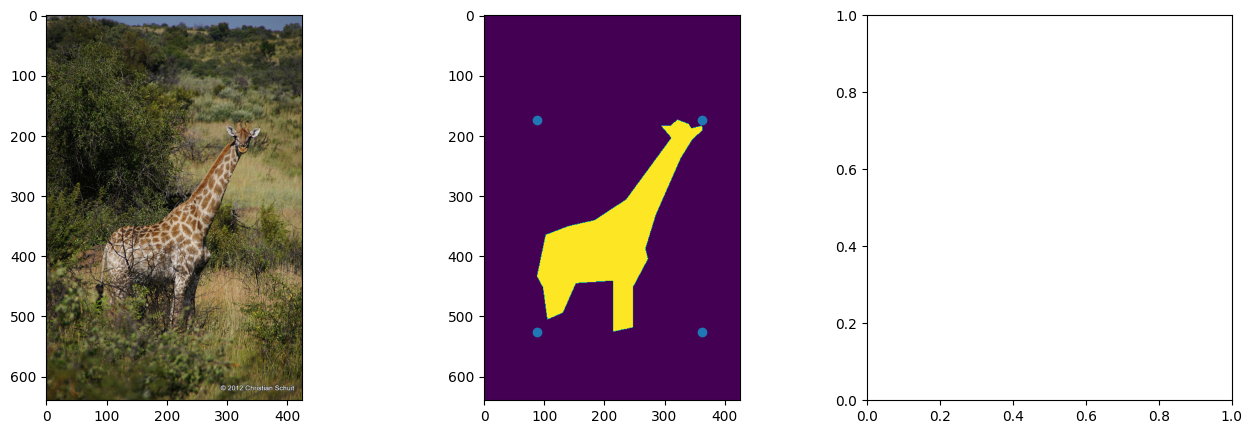

In [26]:
f, ax = plt.subplots(1, 2, figsize=(16, 16))

## good example indices: 4076 (funny)

index = random.randint(0, len(data))
img_data = data[index]
image = img_data['image']
masks = img_data['masks']
bboxes = img_data['bboxes']

empty = np.array([])

display_instances(image, empty, empty, empty, empty, show_mask=False, show_bbox=False, ax=ax[0])

if len(bboxes) > 0:
    print("Amount of bounding boxes:", len(bboxes))
    print("Image index:", img_data['index'])
    print("Paste image index:", img_data['paste_index'])
    boxes = np.stack([b[:4] for b in bboxes], axis=0)
    box_classes = np.array([b[-2] for b in bboxes])
    mask_indices = np.array([b[-1] for b in bboxes])
    show_masks = np.stack(masks, axis=-1)[..., mask_indices]
    class_names = {k: data.coco.cats[k]['name'] for k in data.coco.cats.keys()}
    display_instances(image, boxes, show_masks, box_classes, class_names, show_bbox=True, ax=ax[1])
else:
    display_instances(image, empty, empty, empty, empty, show_mask=False, show_bbox=False, ax=ax[1])

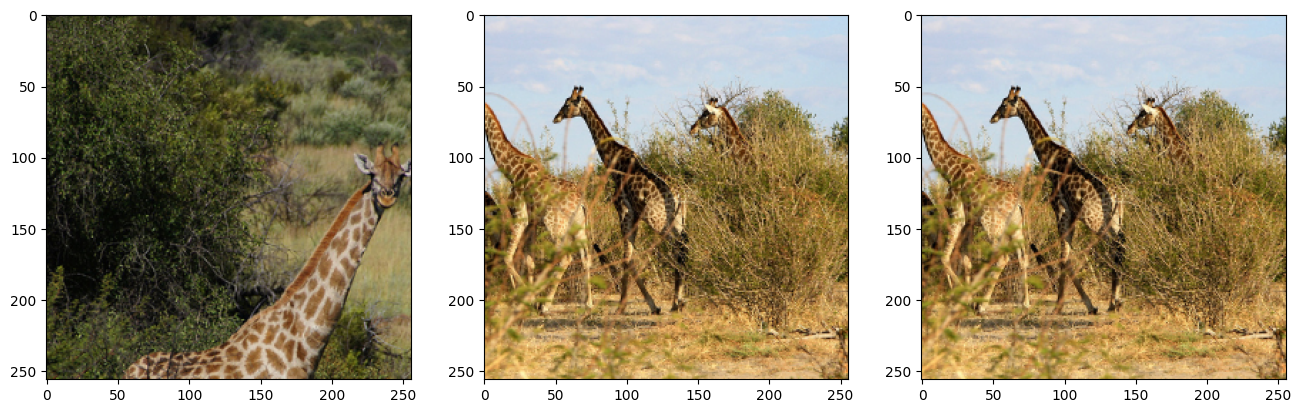

In [27]:
f, ax = plt.subplots(1, 3, figsize=(16, 16))

ax[0].imshow(img_data['paste_image'])
ax[1].imshow(img_data['image'])
ax[2].imshow(img_data['before_image'])
plt.show()

In [44]:
# import fiftyone
# dataset = fiftyone.zoo.load_zoo_dataset("coco-2017")

# ## another option for dataset extraction?

In [23]:
index

4076

In [25]:
geraffe_img_idx = [368686, 189853, 525152h]
img = coco.loadImgs(368686)[0]['file_name']

plt.imshow(img)

NameError: name 'coco' is not defined

In [ ]:
image_test = cv2.imread(os.path.join('../../data/coco_minitrain_25k/images_pruned/train2017', path))